# Iris species classification.

**Problem statement** -
 Given _Sepal Length_ ,_Sepal width_, _Petal length_ and _Petal width_ classify
 each instance into one of **Iris-setosa, Iris-versicolor or Iris-virginica** species using Machine learning Classification algorithms.

## Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
sns.set()

%matplotlib inline

/home/kesari007/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Finding all the columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Checking range of index
data.index

RangeIndex(start=0, stop=150, step=1)

In [8]:
# Checking for any null entries in the dataset.
data[data.isnull().any(axis = 1)].shape

(0, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# since Id column is not very useful to us we will drop it.
data.drop('Id', axis = 1, inplace = True)

In [12]:
# Checking if the Id column is successfully dropped or not.
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [14]:
# Lets check all the unique species of the flower
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# Now lets check their count in the dataset.
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Doing some Exploratory data analysis for understanding the data better.

/home/kesari007/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


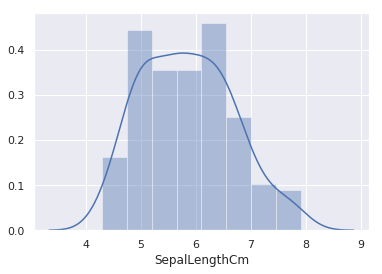

In [16]:
sns.distplot(data['SepalLengthCm'])

/home/kesari007/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


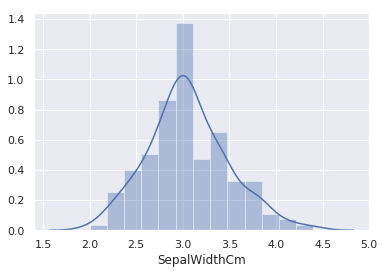

In [17]:
sns.distplot(data['SepalWidthCm'])

/home/kesari007/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


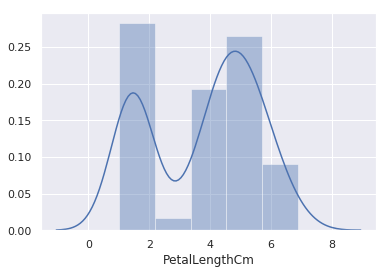

In [18]:
sns.distplot(data['PetalLengthCm'])

/home/kesari007/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


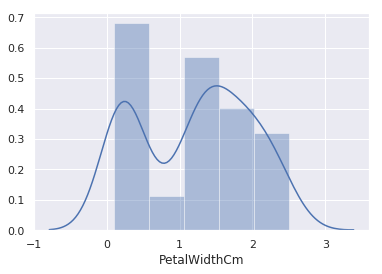

In [19]:
sns.distplot(data['PetalWidthCm'])

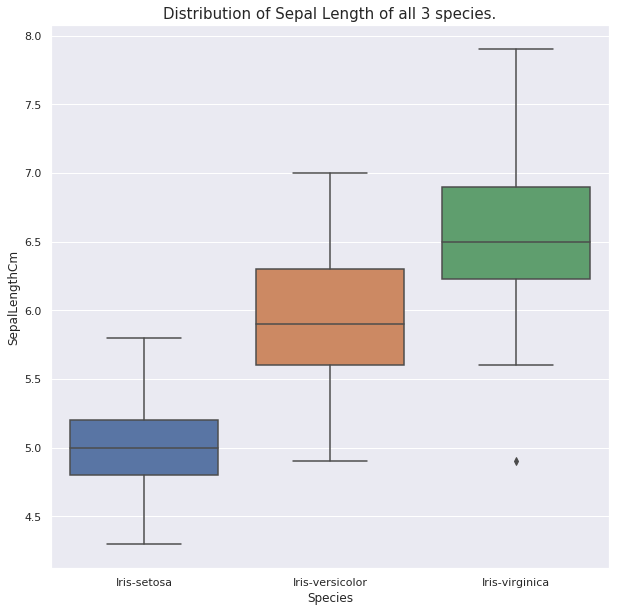

In [20]:
plt.figure(figsize = (10,10))
plt.title("Distribution of Sepal Length of all 3 species.", fontsize = 15)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = data)

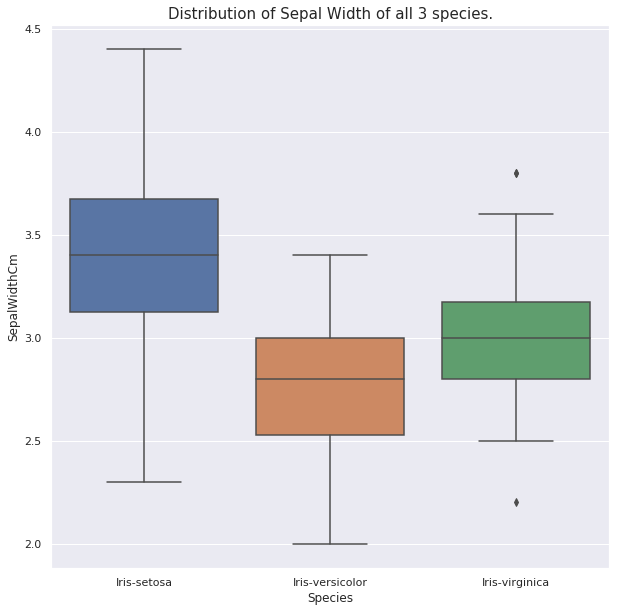

In [21]:
plt.figure(figsize = (10,10))
plt.title("Distribution of Sepal Width of all 3 species.", fontsize = 15)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = data)

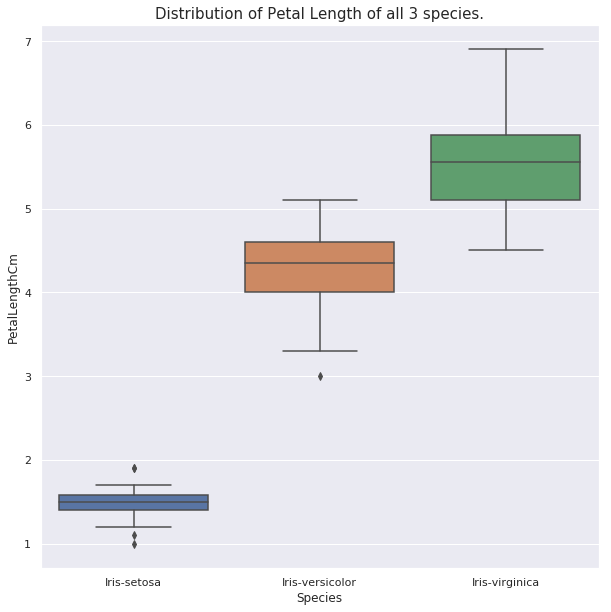

In [22]:
plt.figure(figsize = (10,10))
plt.title("Distribution of Petal Length of all 3 species.", fontsize = 15)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = data)

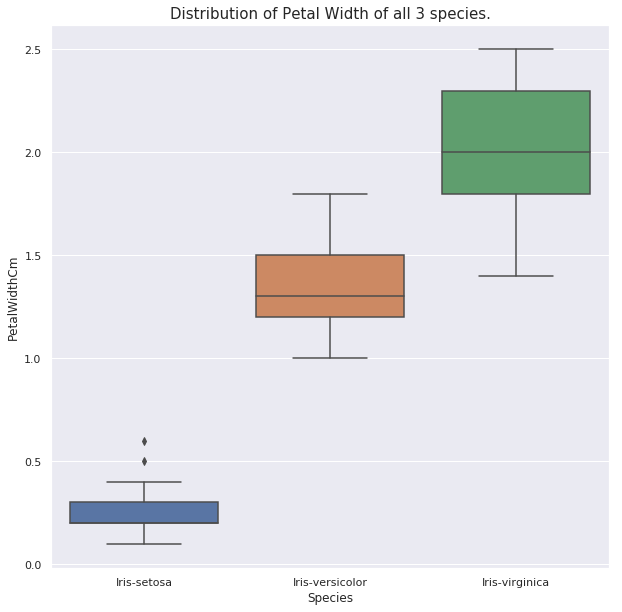

In [23]:
plt.figure(figsize = (10,10))
plt.title("Distribution of Petal Width of all 3 species.", fontsize = 15)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = data)

## Finding correlations.

Correlation is basically association/relation between two quantitative variables(here our features). A correlation coefficient can vary from -1 to +1. Where :
 
* -1 = Two variables(or features) are purely negatively correlated.
*  0 = Two variables are independent of each other.
* +1 = Two variables are purely positively correlated.


In [24]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5,1,'Correlation between all the columns ')

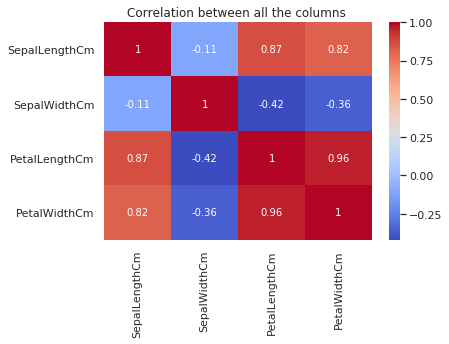

In [25]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation between all the columns ", fontsize = 12)

In [26]:
feature_set = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[feature_set].values

In [27]:
# Since species contains categorical features we will map the species category to 0,1 and 2 respectively.

y = data['Species'].map({'Iris-setosa': 0 , 'Iris-versicolor' :1 ,'Iris-virginica' : 2 }).values

In [28]:
X.shape, y.shape

((150, 4), (150,))

In [29]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

## Building the model.

## 1. Logistic Regression

It's a Linear model which predicts the probabilty that a certain instance will belong to which category.
Based on the probablity we decide the target class to which an instance will belong to. 
For ex- The probability of a certain instance to be a spam message is 0.85 then it will belong to the Spam category, else if the probability is somewhat 0.40 then it won't.
Note - The rounding off of probability to binary values will depend on use case and context.

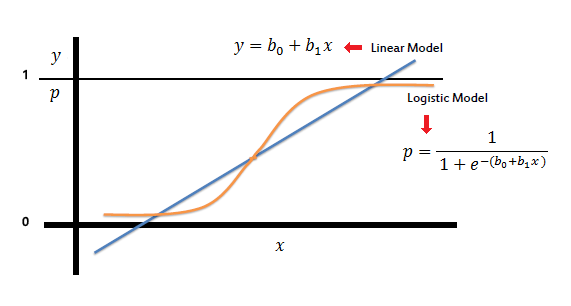

In [30]:
# Splitting the dataset into the test and train part.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 12)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [32]:
# Creating a classifier object and fitting the training dataset.
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
type(y_pred)

numpy.ndarray

Text(30.5,0.5,'Predicted Label')

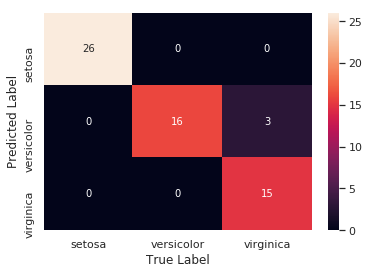

In [34]:
cm = confusion_matrix(y_test, y_pred)

# converting the confusion matrix into a dataframe
cm_df = pd.DataFrame(cm, 
                    index = ['setosa','versicolor','virginica'], 
                    columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot = True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [35]:
# Finding accuracy of our model
acc = accuracy_score(y_test, y_pred)
acc*100

95.0

*So the accuracy of our model using Logistic regression is = 95%*

## 2. K Nearest Neighbor 

In this algorithm a new data point will belong to an existing class depending on where it's *K nearest* data points belong to. For ex - If we take K=3 here, the new data point(a star here) will belong to the class Red Circle(RC) since all the 3 nearest data points belong to the same class.
> Note that the default value of K in KNN is always taken as 5. 

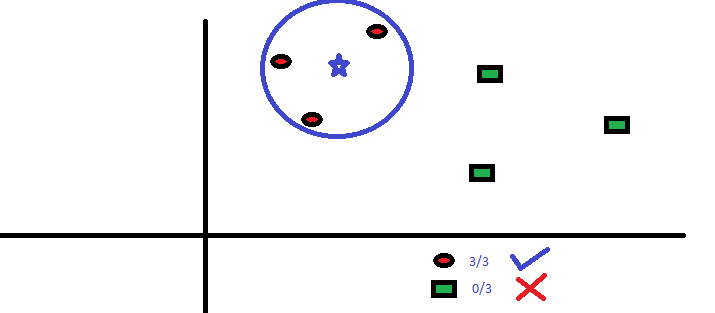

Steps involved in K nearest neighbour algorithm :

* Finding Euclidean or Manhattan distance between the new data point and the rest of the data points and sorting them in ascennding order.
* Finding the class of K nearest data points.
* Get the most frequent class in the K neighbors.
* Predict the class of new data point.

**To choose an optimal value of K we use elbow method i.e we plot few values of K with their error rates and then choose the one with least error rate.**


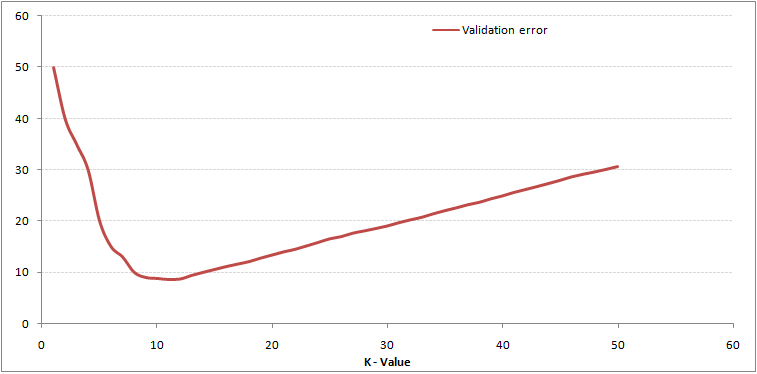

Text(0,0.5,'Accuracy score ')

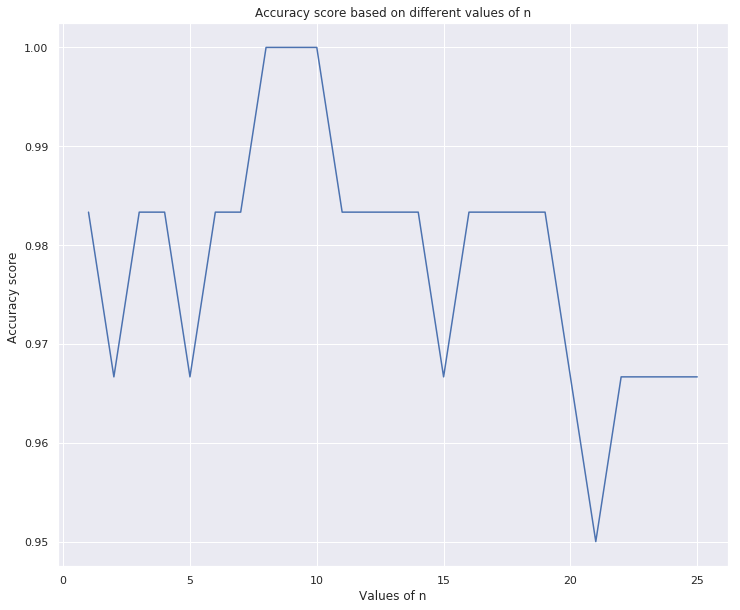

In [36]:
score = []

for n in range(1,26):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize = (12,10))
plt.plot(range(1,26),score)
plt.title("Accuracy score based on different values of n")
plt.xlabel("Values of n")
plt.ylabel("Accuracy score ")

**The accuracy with n = 8,9 and 10 comes out to be 100% !**

In [37]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc*100

100.0

Text(30.5,0.5,'Predicted Label')

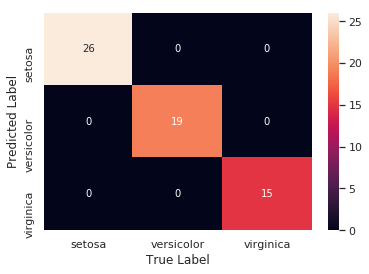

In [38]:
cm = confusion_matrix(y_test, y_pred)

# converting the confusion matrix into a dataframe
cm_df = pd.DataFrame(cm, 
                    index = ['setosa','versicolor','virginica'], 
                    columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot = True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

*So the accuracy of our model using KNN is = 100%*

## 3. Decision Tree Classifier.

A decision tree classifier is a supervised classification technique and can be used in both the cases where the target label is categorical as well as continuous. The main aim of this algorithm is to split the root node(total data points) into smaller homogenous sub-nodes where homogenous sub-nodes are the ones that have all the data points belonging to only one particular target class. So, on what basis the splitting is done? The splitting is done on the basis of various algorithms, some of them are **Gini, Chi-square, Information gain etc**

### Gini 
* It does only binary splits.
* Higher the gini value, higher is the homogenity of the sub-node.

### Advantages of a Tree based classidfier.
* Easy to understand.
* Less data cleaning required.
* Data type is not a constraint.

### Disadvantages 
* Overfitting
* Not very good for continuous variable.

To read in more detail about the same here is one such article. Click [here](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[26,  0,  0],
       [ 0, 16,  3],
       [ 0,  0, 15]])

In [41]:
acc = accuracy_score(y_test, y_pred)
acc*100

95.0

*So the accuracy obtained from our Decision Tree classifier is = 95%*

## 4. Random forest classifier.

The literary meaning of word ‘ensemble’ is group. Ensemble methods involve group of predictive models to achieve a better accuracy and model stability. Ensemble methods are known to impart supreme boost to tree based models.

In [42]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
confusion_matrix(y_test, y_pred)

array([[26,  0,  0],
       [ 0, 16,  3],
       [ 0,  0, 15]])

In [44]:
acc = accuracy_score(y_test, y_pred)
acc*100

95.0

*So the accuracy obtained by our Random forest classifier is = 93.333*